<a href="https://colab.research.google.com/github/fahadfakrul/python-Ai-and-image-processing/blob/main/Short%20project%20on%20fashion%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [ ]:

# importing the dataset using the pandas read_csv method
df = pd.read_csv('/content/Fahad - fashion-mnist_train.csv')

# Deep dive into the columns of the dataset
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Looking into the shape of the mnist dataset
df.shape


(60000, 785)

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df = df.sample(frac=0.3).reset_index(drop=True)

df.shape

(18000, 785)

In [ ]:
# LOOKUP is a dictionary mapping the class labels to their respective names
LOOKUP = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}




In [ ]:
# defining a function display function which on calling will display the actual label of the image
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [ ]:
# Splitting the df dataframe into two variable X and y where y contains the label column and X all the rest column
X = df[df.columns[1:]]  # Assuming the first column is 'label' and rest are features
y = df['label']

In [ ]:
print(y)

0        6
1        7
2        6
3        7
4        4
        ..
17995    2
17996    2
17997    4
17998    4
17999    3
Name: label, Length: 18000, dtype: int64


In [ ]:
print(X)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           1       0       2       0       0       0       0      20      78   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       1       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       2       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
17995       0       0       0       0       0       0       0       4       3   
17996       0       0       0       0       0       0       1       0       0   
17997       0       0       0       0       0       3       0       0       0   
17998       0       0       0       0       0       0       1       0       0   
17999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [ ]:
X.loc[5].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,   0,
         0,   2,   4,   0,   1,   0,   1,   0,   0,  43, 108,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
y.loc[5]

9

Actual label:  Ankle boot


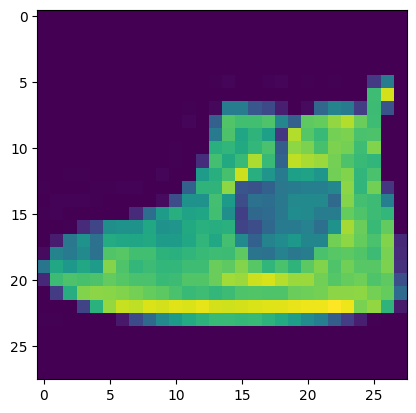

In [ ]:
# Example of using display_image function with specific rows of the dataframe
display_image(X.loc[5].values, y.loc[5])



Actual label:  Bag


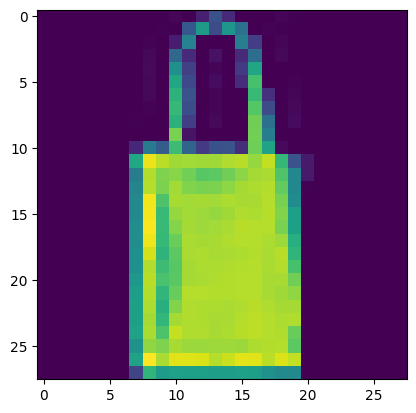

In [ ]:
display_image(X.loc[600].values, y.loc[600])


In [ ]:
# Normalizing the pixel values of images
X = X / 255.
X.head()# Example of using display_image function with specific rows of the dataframe

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.003922,0.0,0.007843,0.0,0.000000,0.0,0.0,0.078431,0.305882,0.000000,...,0.572549,0.407843,0.27451,0.113725,0.0,0.0,0.003922,0.0,0.003922,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.007843,0.000000,0.007843,...,0.568627,0.031373,0.00000,0.003922,0.0,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
# Dividing the dataset into training and testing data using the sklearn library and test size as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now checking the shape of training and testing data
X_train.shape, y_train.shape

X_test.shape, y_test.shape

# defining a function for summarizing the classification of the prediction accuracy on various factors


# Please note that this is a continuation and depends on the context set by the previous blocks of code
# that you have provided


((3600, 784), (3600,))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       364
           1       0.97      0.95      0.96       368
           2       0.76      0.76      0.76       382
           3       0.83      0.88      0.85       378
           4       0.74      0.77      0.76       334
           5       0.94      0.92      0.93       349
           6       0.63      0.59      0.61       354
           7       0.90      0.91      0.90       344
           8       0.95      0.94      0.95       376
           9       0.92      0.94      0.93       351

    accuracy                           0.84      3600
   macro avg       0.84      0.84      0.84      3600
weighted avg       0.84      0.84      0.84      3600



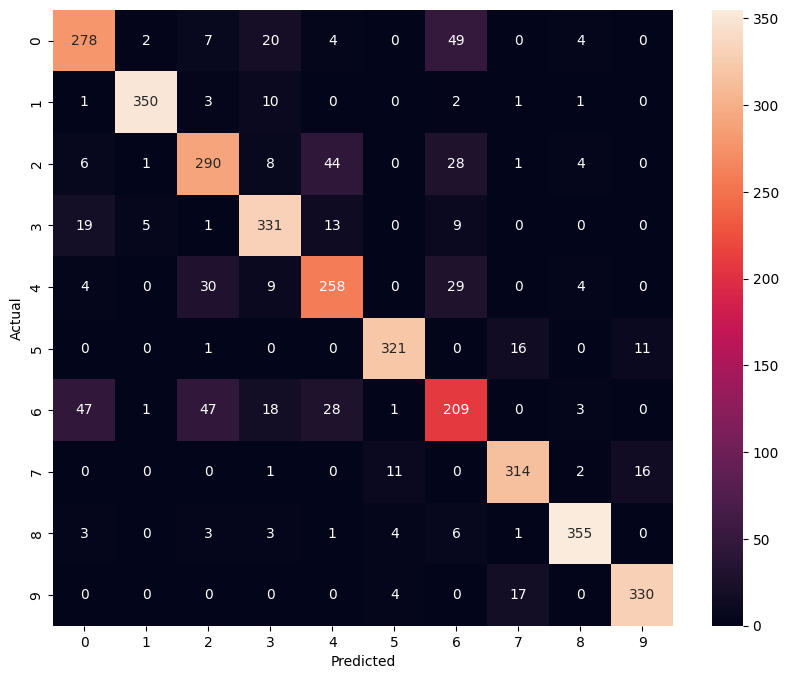

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Fit the logistic regression model
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000)
logistic_model.fit(X_train, y_train)

# Predict using the model
y_pred = logistic_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
y_pred

array([4, 0, 8, ..., 9, 7, 7])

In [ ]:
from joblib import dump, load
from sklearn.linear_model import LogisticRegression

# Let's say you have trained a logistic regression model named `logistic_model`
# logistic_model = LogisticRegression().fit(X_train, y_train)

# Now to save the model to a file
dump(logistic_model, 'logistic_model.joblib')

# Later on, you can load the model back into memory with:
loaded_model = load('logistic_model.joblib')

# And then you can use loaded_model to make predictions
# predictions = loaded_model.predict(X_test)


In [ ]:
# Initializing logistic regression with the 'sag' solver, multi_class set to 'auto', and a maximum of 10000 iterations
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(X_train, y_train)

# Making prediction using the model we trained just above.
y_pred = logistic_model.predict(X_test)
y_pred

# Summarizing the classification we have performed
print(classification_report(y_test, y_pred))

# This output is a printed summary from the summarize_classification function


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       364
           1       0.97      0.95      0.96       368
           2       0.76      0.76      0.76       382
           3       0.83      0.88      0.85       378
           4       0.74      0.77      0.76       334
           5       0.94      0.92      0.93       349
           6       0.63      0.59      0.61       354
           7       0.90      0.91      0.90       344
           8       0.95      0.94      0.95       376
           9       0.92      0.94      0.93       351

    accuracy                           0.84      3600
   macro avg       0.84      0.84      0.84      3600
weighted avg       0.84      0.84      0.84      3600



### Answer these questions to get marks?

If you give a wrong answer you will still get full marks but dont copy from chatgpt will give you straight up zero
1.   Did you run all the codes ?
2.   In which code line we divided them into Y and X from the actual dataset? (just copy that code)
3.   Why did we divide the dataset into test and train?
4.   What doest y_pred represent in this code?
5.   what is the accuracy of your model?



### Write your answer here

1.   Yes
2.   X = df[df.columns[1:]]  
y = df['label']
3. We divided the dataset into test and train because after training the model is evaluated on unseen data, so that how it will behave in real world scenarios.
4.  The predicted values of the unseen data given to the model is stored in y_pred, which is then compared to the actual to the test result of seen data.
5. It's accuracy is 84%.

